In [5]:
from collections import Counter
import pickle
import pandas as pd

In [10]:
with open(r"../data/metadata_dump_multiprocessing_extended.pkl", "rb") as f:
    data = pickle.load(f)

for k in data:
    print(k)

floor_reached
master_deck
relics
damage_taken_by_enemy
potions_obtained
floors_visited
path_per_floor_counts
items_purchased
neow_bonus
build_version
purchased_purges
events
event_player_choices
neow_cost
is_trial
character_chosen
is_prod
is_daily
chose_seed
circlet_count
win_rate
is_beta
is_endless
special_seed
_total_processed_logs
_total_modded_logs_skipped
_total_modded_reasons
_total_data_errors_in_logs
_total_filter_errors
_files_processed_successfully
_files_failed_processing


In [7]:
floor_reached = data['floor_reached']
distances = [(k, v) for k, v in floor_reached.items()]
df = pd.DataFrame(distances, columns=["floor", "count"])
print(min(df.floor))
print(max(df.floor))

0
379


In [8]:
df

,floor,count
0,28,795679
1,51,3696613
2,16,6640609
3,30,614916
4,13,675435
...,...,...
152,137,1
153,148,1
154,118,1
155,154,1


In [154]:
master_deck = data['master_deck']
print(type(master_deck))
print(len(master_deck))

<class 'collections.Counter'>
784


In [155]:
card_counts = [(k, v) for k, v in master_deck.items()]
cc_df = pd.DataFrame(card_counts, columns=["card", "count"])
cc_df = cc_df.sort_values('card').reset_index(drop=True)
VALID_CARDS = set(cc_df.loc[(cc_df['count'] >= 1000) | cc_df['card'].str.startswith("Searing"), 'card'])
VALID_CARDS

{'A Thousand Cuts',
 'A Thousand Cuts+1',
 'Accuracy',
 'Accuracy+1',
 'Acrobatics',
 'Acrobatics+1',
 'Adaptation',
 'Adaptation+1',
 'Adrenaline',
 'Adrenaline+1',
 'After Image',
 'After Image+1',
 'Aggregate',
 'Aggregate+1',
 'All For One',
 'All For One+1',
 'All Out Attack',
 'All Out Attack+1',
 'Alpha',
 'Alpha+1',
 'Amplify',
 'Amplify+1',
 'Anger',
 'Anger+1',
 'Apotheosis',
 'Apotheosis+1',
 'Armaments',
 'Armaments+1',
 'AscendersBane',
 'Auto Shields',
 'Auto Shields+1',
 'Backflip',
 'Backflip+1',
 'Backstab',
 'Backstab+1',
 'Ball Lightning',
 'Ball Lightning+1',
 'Bandage Up',
 'Bandage Up+1',
 'Bane',
 'Bane+1',
 'Barrage',
 'Barrage+1',
 'Barricade',
 'Barricade+1',
 'Bash',
 'Bash+1',
 'Battle Trance',
 'Battle Trance+1',
 'BattleHymn',
 'BattleHymn+1',
 'Beam Cell',
 'Beam Cell+1',
 'Berserk',
 'Berserk+1',
 'Biased Cognition',
 'Biased Cognition+1',
 'Bite',
 'Bite+1',
 'Blade Dance',
 'Blade Dance+1',
 'Blasphemy',
 'Blasphemy+1',
 'Blind',
 'Blind+1',
 'Blizzard

In [120]:
searing_blows = [(k, v) for k, v in master_deck.items() if k[:7] == "Searing"]
searing_blows = sorted(searing_blows)
sb = [(0, searing_blows[0][1]),]
for k, v in searing_blows[1:]:
    level = int(k.split("+")[1])
    count = v
    sb.append((level, count))
sb_df = pd.DataFrame(sb, columns=["level", "count"])
sb_df

,level,count
0,0,645719
1,1,453193
2,10,15135
3,11,12701
4,12,8458
...,...,...
90,92,1
91,93,2
92,94,1
93,95,2


<Axes: xlabel='level'>

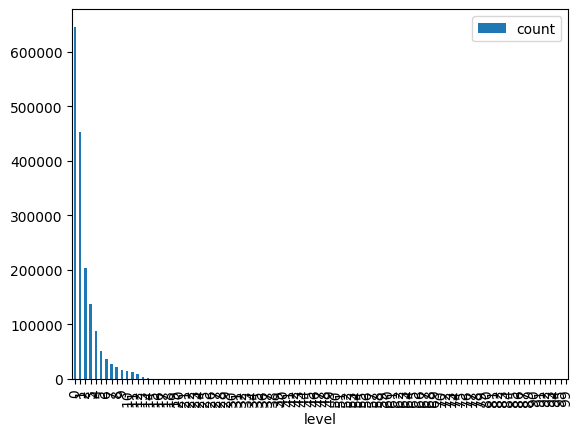

In [121]:
sb_df.sort_values("level").plot(x="level", y="count", kind="bar")

In [156]:
upgraded = [(k, v) for k, v in master_deck.items() if ("+" in k) and (k[:7] != "Searing")]
upgraded

[('Defend_R+1', 11290972),
 ('Anger+1', 2114108),
 ('Inflame+1', 3519682),
 ('Cleave+1', 2456765),
 ('Spot Weakness+1', 2247865),
 ('Pommel Strike+1', 2907680),
 ('Wild Strike+1', 826461),
 ('Whirlwind+1', 2385764),
 ('Glacier+1', 1233869),
 ('Force Field+1', 460601),
 ('Doom and Gloom+1', 771564),
 ('Storm+1', 1509358),
 ('Apotheosis+1', 1438095),
 ('Ball Lightning+1', 2471483),
 ('Defragment+1', 4727835),
 ('Compile Driver+1', 732160),
 ('Redo+1', 2777745),
 ('Sweeping Beam+1', 1335420),
 ('Blizzard+1', 716970),
 ('Strike_R+1', 10747940),
 ('Armaments+1', 5918535),
 ('Clash+1', 1671058),
 ('True Grit+1', 2546396),
 ('Flame Barrier+1', 2005919),
 ('Bash+1', 6783462),
 ('Ghostly Armor+1', 1052563),
 ('Warcry+1', 1494838),
 ('Body Slam+1', 3252611),
 ('Rage+1', 1550141),
 ('Headbutt+1', 1523518),
 ('Entrench+1', 1244521),
 ('Intimidate+1', 760861),
 ('Rampage+1', 1796955),
 ('Seeing Red+1', 1894016),
 ('Thunderclap+1', 1796647),
 ('Bloodletting+1', 613527),
 ('Strike_G+1', 7635005),
 ('

In [157]:
base = [(k, v) for k, v in master_deck.items() if ("+" not in k) and (k[:7] != "Searing")]
len(base)

351

In [158]:
upgraded_set = set(vals[0].split("+")[0] for vals in upgraded)
base_set = set(vals[0] for vals in base)


In [159]:
base_set.difference(upgraded_set)

{'AscendersBane',
 'Clumsy',
 'CurseOfTheBell',
 'Decay',
 'Doubt',
 'Injury',
 'Necronomicurse',
 'Normality',
 'Pain',
 'Parasite',
 'Regret',
 'Shame',
 'Writhe'}

In [4]:
damage_taken_by_enemy = data['damage_taken_by_enemy']
damage_taken_by_enemy

defaultdict(collections.Counter,
            {'Cultist': Counter({0: 21937043,
                      1: 8425582,
                      6: 3709529,
                      2.0: 1322522,
                      4: 1224916,
                      5: 1080078,
                      3.0: 854303,
                      7.0: 535874,
                      10: 513139,
                      9: 352978,
                      8.0: 327914,
                      11: 318800,
                      12: 215845,
                      15: 129193,
                      13: 125474,
                      14: 72125,
                      16: 71287,
                      17: 49348,
                      18: 42367,
                      20: 23592,
                      19: 19916,
                      23: 12807,
                      22: 12105,
                      21: 9877,
                      24: 6847,
                      25: 6096,
                      28.0: 4037,
                      27.0: 3814,
             

In [9]:
damage_consolidated = Counter()
for k, v in damage_taken_by_enemy.items():
    total_battles = sum(d for d in v.values())
    damage_consolidated[k] += total_battles

# for k, v in damage_consolidated.items():
#     print(k, f"{v:_}", sep="\t")
enemies = set(damage_consolidated.keys())
print(enemies)

{'Spire Growth', '3 Sentries', 'Giant Head', 'Lagavulin Event', 'Spheric Guardian', 'Chosen and Byrds', 'Sphere and 2 Shapes', 'Lots of Slimes', 'Snake Plant', '3 Cultists', '3 Shapes', 'Cultist', 'Slavers', 'Nemesis', 'Orb Walker', '4 Shapes', 'Looter', 'Donu and Deca', 'Writhing Mass', '3 Louse', 'Reptomancer', 'Time Eater', 'Champ', 'Chosen', 'Hexaghost', 'Red Slaver', '3 Byrds', 'Jaw Worm', 'Gremlin Gang', '2 Louse', 'The Mushroom Lair', 'Snecko', '2 Orb Walkers', 'Exordium Thugs', 'Shell Parasite', 'The Guardian', 'Slime Boss', 'Automaton', 'Mind Bloom Boss Battle', 'Lagavulin', 'Awakened One', 'Small Slimes', 'Jaw Worm Horde', 'Maw', 'Gremlin Nob', 'Transient', 'Sentry and Sphere', 'Shelled Parasite and Fungi', 'Centurion and Healer', 'Colosseum Nobs', 'Shield and Spear', '2 Thieves', 'Blue Slaver', '2 Fungi Beasts', 'Colosseum Slavers', 'Collector', 'Masked Bandits', 'Large Slime', 'The Heart', '3 Darklings', 'Gremlin Leader', 'Book of Stabbing', 'Cultist and Chosen', 'Exordium 

In [127]:
neow_bonus = data['neow_bonus']
print(type(neow_bonus))
print(len(neow_bonus))
# for k, v in neow_bonus.items():
#     print(item)

neow_bonus

<class 'collections.Counter'>
19


Counter({'THREE_ENEMY_KILL': 19487342,
         'BOSS_RELIC': 6346681,
         'TEN_PERCENT_HP_BONUS': 5842586,
         'RANDOM_COMMON_RELIC': 5824489,
         'ONE_RARE_RELIC': 4165478,
         'ONE_RANDOM_RARE_CARD': 3289516,
         'HUNDRED_GOLD': 2962915,
         'THREE_RARE_CARDS': 2706593,
         'THREE_CARDS': 2170334,
         'TWO_FIFTY_GOLD': 1998901,
         'UPGRADE_CARD': 1976778,
         'RANDOM_COLORLESS': 1906939,
         'TRANSFORM_TWO_CARDS': 1486581,
         'TRANSFORM_CARD': 1482544,
         'RANDOM_COLORLESS_2': 1402359,
         'REMOVE_CARD': 1174381,
         'REMOVE_TWO': 1170604,
         'TWENTY_PERCENT_HP_BONUS': 972335,
         'THREE_SMALL_POTIONS': 891216})

In [108]:
build_version = data['build_version']
print(type(build_version))
print(len(build_version))

<class 'set'>
172


In [17]:
build_version

{'2018-06-14',
 '2018-06-14v2',
 '2018-06-18',
 '2018-06-19v2',
 '2018-06-20v3',
 '2018-06-21',
 '2018-06-21v2',
 '2018-06-26',
 '2018-06-27',
 '2018-06-28',
 '2018-06-29',
 '2018-07-02',
 '2018-07-05',
 '2018-07-11',
 '2018-07-12',
 '2018-07-13',
 '2018-07-16',
 '2018-07-17',
 '2018-07-19',
 '2018-07-19v2',
 '2018-07-23',
 '2018-07-24',
 '2018-07-26',
 '2018-07-30',
 '2018-07-31',
 '2018-08-01',
 '2018-08-02',
 '2018-08-07',
 '2018-08-08',
 '2018-08-09',
 '2018-08-13v2',
 '2018-08-16',
 '2018-08-20',
 '2018-08-21',
 '2018-08-23v2',
 '2018-08-27',
 '2018-08-29',
 '2018-08-30',
 '2018-09-04',
 '2018-09-04-v2',
 '2018-09-06',
 '2018-09-10',
 '2018-09-12',
 '2018-09-17',
 '2018-09-18',
 '2018-09-18v2',
 '2018-09-18v3',
 '2018-09-19',
 '2018-09-20',
 '2018-09-24',
 '2018-09-25',
 '2018-09-26v2',
 '2018-09-27',
 '2018-10-02',
 '2018-10-03',
 '2018-10-04',
 '2018-10-04v2',
 '2018-10-08',
 '2018-10-09',
 '2018-10-10',
 '2018-10-11',
 '2018-10-15',
 '2018-10-15v2',
 '2018-10-16',
 '2018-10-17'

In [109]:
purchased_purges = data['purchased_purges']
print(type(purchased_purges))
print(len(purchased_purges))

<class 'collections.Counter'>
85


In [110]:
purges = [(k, v) for k, v in data['purchased_purges'].items()]
purges_df = pd.DataFrame(purges, columns=['purges', 'count'])

In [111]:
purges_df

,purges,count
0,0,36010177
1,2,8151094
2,1,18391844
3,3,3212237
4,4,1066019
...,...,...
80,88,1
81,46,1
82,32,5
83,98,1


In [112]:
events = data['events']
print(type(events))
print(len(events))

<class 'collections.Counter'>
72


In [115]:
# for k, v in events.items():
#     print(k, v, sep="\t")
#
EVENTS = {k for k, v in events.items() if v > 100}
EVENTS

{'Accursed Blacksmith',
 'Addict',
 'Back to Basics',
 'Beggar',
 'Big Fish',
 'Bonfire Elementals',
 'Colosseum',
 'Cursed Tome',
 'Dead Adventurer',
 'Designer',
 'Drug Dealer',
 'Duplicator',
 'FaceTrader',
 'Falling',
 'Forgotten Altar',
 'Fountain of Cleansing',
 'Ghosts',
 'Golden Idol',
 'Golden Shrine',
 'Golden Wing',
 'Knowing Skull',
 'Lab',
 'Liars Game',
 'Living Wall',
 'Masked Bandits',
 'Match and Keep!',
 'MindBloom',
 'Mushrooms',
 'Mysterious Sphere',
 "N'loth",
 'Nest',
 'NoteForYourself',
 'Purifier',
 'Scrap Ooze',
 'SecretPortal',
 'SensoryStone',
 'Shining Light',
 'The Cleric',
 'The Joust',
 'The Lab',
 'The Library',
 'The Mausoleum',
 'The Moai Head',
 'The Woman in Blue',
 'Tomb of Lord Red Mask',
 'Transmorgrifier',
 'Upgrade Shrine',
 'Vampires',
 'WeMeetAgain',
 'Wheel of Change',
 'Winding Halls',
 'World of Goop'}

In [ ]:
"""
neow_cost
is_trial
character_chosen
is_prod
is_daily
chose_seed
circlet_count
win_rate
is_beta
is_endless
special_seed
"""

In [11]:
neow_cost = data['neow_cost']
print(neow_cost)

for k in neow_cost:
    print(k)
# Dump '', 'FIFTY_PERCENT_DAMAGE', 'BASIC_CARDS'

Counter({'NONE': 48540099, 'PERCENT_DAMAGE': 3352678, 'NO_GOLD': 3317126, 'TEN_PERCENT_HP_LOSS': 2954013, 'CURSE': 2782213, None: 0})
NONE
TEN_PERCENT_HP_LOSS
PERCENT_DAMAGE
CURSE
NO_GOLD
None


In [9]:
is_trial = data['is_trial']
is_trial

Counter({False: 68593271})

In [12]:
character_chosen = data['character_chosen']
# character_chosen
for k in character_chosen.keys():
    print(k)
# Dump character_chosen == 'SCHOLAR'

IRONCLAD
DEFECT
THE_SILENT
WATCHER


In [11]:
is_prod = data['is_prod']
is_prod

Counter({False: 68593271})

In [12]:

is_daily = data['is_daily']
is_daily

Counter({False: 68593271})

In [13]:
chose_seed = data['chose_seed']
chose_seed

Counter({False: 68591484, True: 1787})

In [15]:
circlet_count = data['circlet_count']
# circlet_count

# remove circle_count > 0

In [18]:
win_rate = data['win_rate']
# Keep all win_rates because I have no idea what this metric is

In [20]:
is_beta = data['is_beta']
for k, v in is_beta.items():
    print(k, f"{v:_}")

False 62_160_293
True 6_358_713


In [21]:
is_endless = data['is_endless']
is_endless

Counter({False: 68593271})

In [20]:
special_seed = data['special_seed']
# special_seed

In [19]:
potions_obtained = data['potions_obtained']
potions_consolidated = Counter()
for k, v in potions_obtained.items():
    potions_consolidated[k] += sum(n for n in v.values())
POTIONS = {k for k, v in potions_consolidated.items() if v > 100_000}
print(POTIONS)

{'HeartOfIron', 'Explosive Potion', 'SmokeBomb', 'BlessingOfTheForge', 'Poison Potion', 'EssenceOfSteel', 'GhostInAJar', 'Dexterity Potion', 'SteroidPotion', 'SneckoOil', 'FairyPotion', 'DuplicationPotion', 'SkillPotion', 'FocusPotion', 'Swift Potion', 'Fruit Juice', 'BottledMiracle', 'Block Potion', 'DistilledChaos', 'Strength Potion', 'Regen Potion', 'EntropicBrew', 'Ancient Potion', 'PotionOfCapacity', 'CunningPotion', 'PowerPotion', 'FearPotion', 'Weak Potion', 'AttackPotion', 'SpeedPotion', 'Fire Potion', 'ColorlessPotion', 'Energy Potion', 'LiquidBronze', 'EssenceOfDarkness', 'LiquidMemories', 'ElixirPotion', 'Ambrosia', 'StancePotion', 'BloodPotion', 'GamblersBrew', 'CultistPotion'}


In [27]:
path_per_floor_counts = data['path_per_floor_counts']
path_per_floor_counts

Counter({'M': 500600203,
         '?': 251181851,
         'R': 243332208,
         'E': 136941430,
         '$': 121193739,
         'T': 104046362,
         'B': 74886416,
         'WH': 16,
         'MIM': 7,
         'PTL': 7,
         'AVR': 3,
         'R\x00\x00\x00\r\x00\x00\x00??\x00\x00\x00\x00????\x00\x00': 2})

In [29]:
paths = {k for k, v in path_per_floor_counts.items() if v > 100}
paths

{'$', '?', 'B', 'E', 'M', 'R', 'T'}

In [6]:
data["events"]

Counter({'Golden Idol': 10951372,
         'Living Wall': 10928649,
         'Liars Game': 10860128,
         'Big Fish': 10835293,
         'Golden Wing': 10831180,
         'World of Goop': 10826443,
         'Shining Light': 10786133,
         'Scrap Ooze': 10780454,
         'The Cleric': 10656379,
         'Colosseum': 7641945,
         'Bonfire Elementals': 4831161,
         'Match and Keep!': 4716884,
         'Upgrade Shrine': 4644986,
         'Masked Bandits': 4625694,
         'Purifier': 4623472,
         'Nest': 4619609,
         'Vampires': 4617053,
         'Drug Dealer': 4613898,
         'Ghosts': 4613440,
         'The Mausoleum': 4612992,
         'Back to Basics': 4609702,
         'The Library': 4604974,
         'Forgotten Altar': 4598898,
         'Golden Shrine': 4566345,
         'Cursed Tome': 4559464,
         'Transmorgrifier': 4543624,
         'Wheel of Change': 4542140,
         'FaceTrader': 4417035,
         'Accursed Blacksmith': 4412396,
         'WeM

In [20]:
for k, v in data["event_player_choices"].items():
    if k not in ("Masked Bandits", "N'loth", "Knowing Skull"):

        print(f"Event name: <{k}>\t{sum(v.values()):_}")
        for k2, v2 in v.items():
            print("\t", f"<{k2}>", f"{v2:_}", sep="\t")
        print()


Event name: <Liars Game>	10_794_480
		<Ignored>	3_625_585
		<AGREE>	7_168_895

Event name: <Scrap Ooze>	10_716_700
		<Success>	10_078_393
		<Fled>	638_307

Event name: <Vampires>	4_598_403
		<Became a vampire>	1_296_069
		<Ignored>	3_037_768
		<Became a vampire (Vial)>	264_566

Event name: <Drug Dealer>	4_592_189
		<Obtain J.A.X.>	436_582
		<Inject Mutagens>	2_738_874
		<Became Test Subject>	1_416_733

Event name: <Wheel of Change>	4_521_596
		<Full Heal>	758_287
		<Card Removal>	758_276
		<Relic>	761_327
		<Gold>	759_655
		<Cursed>	739_301
		<Damaged>	744_750

Event name: <Golden Wing>	10_794_648
		<Card Removal>	7_024_136
		<Ignored>	1_770_754
		<Gained Gold>	1_999_757
		<Card R??al>	1

Event name: <The Mausoleum>	4_585_832
		<Opened>	3_983_738
		<Ignored>	602_094

Event name: <Forgotten Altar>	4_580_185
		<Shed Blood>	3_018_284
		<Gave Idol>	768_847
		<Smashed Altar>	793_054

Event name: <Colosseum>	7_615_484
		<Fight>	3_956_127
		<Fought Nobs>	2_109_675
		<Fled From Nobs>	1_549_6

In [3]:
for k, v in data["event_player_choices"].items():
    if len(v) < 25:
        print(k)
        for opt in v:
            print(f"\t{opt}")

Liars Game
	Ignored
	AGREE
	disagreed
	agreed
Scrap Ooze
	Success
	Fled
	success
	unsuccessful
Vampires
	Became a vampire
	Ignored
	Became a vampire (Vial)
Drug Dealer
	Obtain J.A.X.
	Inject Mutagens
	Became Test Subject
	Got JAX
	Got JAXXED
	Ignored
Wheel of Change
	Full Heal
	Card Removal
	Relic
	Gold
	Cursed
	Damaged
	Curse
	Damage
Golden Wing
	Card Removal
	Ignored
	Gained Gold
	Card R??al
The Mausoleum
	Opened
	Ignored
	Yes
	No
Forgotten Altar
	Shed Blood
	Gave Idol
	Smashed Altar
Colosseum
	Fight
	Fought Nobs
	Fled From Nobs
WeMeetAgain
	Gave Potion
	Gave Card
	Paid Gold
	Ignored
	Gold
	Potion
	Card
	Attack
The Lab
	Got Potions
Match and Keep!
	1 cards matched
	2 cards matched
	3 cards matched
	0 cards matched
	5 cards matched
	4 cards matched
	6 cards matched
Big Fish
	Donut
	Box
	Banana
World of Goop
	Gather Gold
	Left Gold
	Left
Shining Light
	Entered Light
	Ignored
Accursed Blacksmith
	Forge
	Rummage
	Ignored
	Ignore
Cursed Tome
	Ignored
	Obtained Book
	Stopped
Transmorgrif

In [45]:
knowing_skull_choices = tuple(k for k in data["event_player_choices"]["Knowing Skull"].keys())

ksc_counts = [Counter(choice.strip().split(" ")) for choice in knowing_skull_choices]
counts_list = []
for item in ksc_counts:
    counts_list.append(tuple((k, v) for k, v in item.items()))
counts = Counter(counts_list)

unique_items = set()
for item in counts_list:
    for left, right in item:
        unique_items.add(left)
unique_items


{'', 'CARD', 'GOLD', 'POTION'}

In [51]:
from itertools import product

[p for p in product(["CARD", "GOLD", "POTION"])]

choices = (("SKIP",), ("CARD",), ("GOLD",), ("POTION",), ("CARD", "GOLD",), ("CARD", "POTION"), ("CARD", "GOLD", "POTION"))

[('CARD',), ('GOLD',), ('POTION',)]

In [56]:
mb = data["event_player_choices"]["Masked Bandits"]
total = 0
for k, v in mb.items():
    if k != "Fought Bandits" or k != "Paid Fearfully":
        total += v
total

4625694

In [58]:
print(f"{3491188:_}")
print(f"{1133051:_}")
print(f"{4625694:_}")

3_491_188
1_133_051
4_625_694


In [60]:
nloth = data["event_player_choices"]["N'loth"]
nloth

Counter({'Traded Relic': 928820,
         'Ignored': 243929,
         'Traded a Golden Idol': 183,
         'Traded a NeowsBlessing': 173,
         'Traded a Whetstone': 138,
         'Traded a Astrolabe': 134,
         'Traded a War Paint': 130,
         'Traded a Orrery': 123,
         'Traded a Ring of the Snake': 118,
         'Traded a Dream Catcher': 116,
         'Traded a Potion Belt': 111,
         'Traded a Strawberry': 110,
         'Traded a Tiny House': 108,
         'Traded a Boot': 106,
         'Traded a Pear': 98,
         'Traded a Empty Cage': 98,
         'Traded a Centennial Puzzle': 97,
         'Traded a Cracked Core': 93,
         'Traded a Darkstone Periapt': 91,
         'Traded a Oddly Smooth Stone': 88,
         'Traded a Bronze Scales': 88,
         'Traded a Blood Vial': 86,
         'Traded a Calling Bell': 85,
         'Traded a Burning Blood': 82,
         'Traded a Bag of Marbles': 81,
         'Traded a MawBank': 81,
         'Traded a Bag of Preparat